<hr size="4" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong> Tendance
<hr size="4" color="blue">

# Import

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
from datetime import datetime
import warnings
warnings.simplefilter("ignore")#, UserWarning
import datetime
%matplotlib inline

In [17]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
# Données avec tout les effets + effet
dfSimu=pd.read_csv('Data/Simulate/Simulated.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données avec saisonnalité uniquement
dfSea=pd.read_csv('Data/Simulate/SimulatedSeasonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données stationnaire
dfsta=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Donnes avec une tendance
dfTrend=pd.read_csv('Data/Simulate/SimulatedTrend.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
#Donnees avec trend and saisonalité
dfTrendSais=pd.read_csv('Data/Simulate/SimulatedTrendSaisonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)


In [ ]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
# Données avec tout les effets + effet
dfSimu=pd.read_csv('Data/Simulate/Simulated.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données avec saisonnalité uniquement
dfSea=pd.read_csv('Data/Simulate/SimulatedSeasonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données stationnaire
dfSta=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Donnes avec une tendance
dfTrend=pd.read_csv('Data/Simulate/SimulatedTrend.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
#Donnees avec trend and saisonalité
dfTrendSais=pd.read_csv('Data/Simulate/SimulatedTrendSaisonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# données nettoyer
dfSimuClean=pd.read_csv('Data/Simulate/SimulatedClean.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

# 1) Présentation

<div style="border: 2px solid #1EF223; padding: 3px; background-color: #DEFFCD; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">

La tendance est l'orientation générale d'une série d'observations à la hausse ou à la baisse sur une période assez longue. Lorsqu'il n'existe pas d'orientation, on dit qu'il n'y a pas de tendance, ce qui ne signifie évidemment pas que toutes les valeurs sont les mêmes...

Rappelons une règle de base pour l’étude de séries temporelle. C'est la décomposition analytique : chronique = tendance + variations périodiques + variations résiduelles aléatoires (+ cycle éventuel.

On parle de tendance lorsque la série chronologique $x(t)$ peut s’écrire, à une erreur d’ajustement $\epsilon(t)$ près, comme une combinaison linéaire de m fonctions du temps, choisies a priori (par exemple fonction puissance, exponentielle, logarithmique...) :

- la tendance est linéaire ( $m = 1$) et  $f(t) =a_1 (t) +a_0$ 
Lorsque 
\begin{equation}
x(t) = a_1 t + a_0 + \epsilon(t)
\end{equation}

- La tendance polynomiale se traduira par 
\begin{equation}
x(t) = a_n t^n+a_{n-1}+ +  a_1 t + a_0 + \epsilon(t)
\end{equation}

La tendance (trend) est souvent la première chose à détecter lors de l'analyse d'une série temporelle 

La première étape consiste donc à détecter si une tendance existe. Après observation visuelle du graphique, il est recommandé de procéder à des tests d'hypothèses. On le verra dans la partie 3).

# 2) Estimation de la tendance

Plaçons nous le cadre d'un modèle déterministe.(Au contraire de probabilistique)
 
 
 ## 2.1) Moyenne mobile
Lavtendance peut aussi être estimée par des moyennes mobiles (MM), qui ont le défaut de ne pas donneer lieu à une expression algébrique mais à une série de valeurs filtrées à partir de laquelle on pourra déterminée f.
Le choix de la taille de la fenêtre est assez délicat. En effet, elle est fonction de la durée d'une période (c'est l'ordre de la MM) qui est inconnu....Les MM ne  permettent pas d'obtenir une tendance pure, celle-ci étant mélangée à une composante cyclique.

<AxesSubplot:xlabel='Times'>

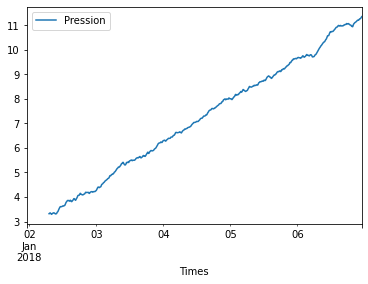

In [18]:
dfTr=dfTrendSais.rolling(96).mean()
dfTr.plot()

## 2.1) Méthodes analytique ( Régression linéaire)

La méthode analytique d’estimation de tendance repose sur des fondements théoriques mais aussi sur des choix : détermination a priori du modèle de tendance (fonction linéaire ou exponentielle du temps, par exemple) et d’un schéma de décomposition additif ou multiplicatif qui permet d'isoler au mieux la composante saisonnière. Il existe bien sûr des moyens d’évaluer la qualité du modèle obtenu.L’avantage de résumer une tendance par une équation est toutefois évident : ***les prévisions*** sont assez faciles à établir, et pas seulement en t + 1.

On va supposer ici la tendance linéaire. Elle est alors formalisée par la droite de régression linéaire entre l’unité de mesure du temps t (t = 1, 2, 3…) et y (pression).

***Remarque :*** 
Le coefficient de corrélation associé à cette régression est peut-être tout petit mais c’est normal si les fluctuations saisonnières sont importantes. C’est l'une des raisons pour laquelle les prévisionnistes procèdent à la régression sur moyennes annuelles ou sur la série filtrée par moyennes mobiles.

http://www.jybaudot.fr/Previsions/trend.html

http://www.jybaudot.fr/Previsions/anovachro.html

Avant de se lancer tête baissée dans une désaisonnalisation, il faut peut-être se demander si celle-ci est vraiment nécessaire. Idem avant de convenir ou non qu’il existe une tendance. Donc, en amont de l’analyse d’une série chronologique, nous allons procéder à deux tests probatoires.

La tendance (trend) est souvent la première chose à détecter lors de l'analyse d'une série temporelle.
La tendance est l'orientation générale d'une série d'observations à la hausse ou à la baisse sur une période assez longue. Lorsqu'il n'existe pas d'orientation, on dit qu'il n'y a pas de tendance, ce qui ne signifie évidemment pas que toutes les valeurs sont les mêmes...

<div style="border: 2px solid #C0392B; padding: 3px; background-color: #E6B0AA; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
   
   la décomposition analytique : chronique = tendance + variations périodiques + variations résiduelles aléatoires (+ cycle économique éventuel). 


La page que vous avez la chance d’avoir sous les yeux étudie la composante « tendance » dans les cas où celle-ci est estimée par une fonction f(t), avec une unité de mesure temporelle t = 1, 2, 3… Comme on suppose que la série est fonction du temps, nous sommes dans le cadre d'un modèle déterministe. 

<div style="border: 2px solid #C0392B; padding: 3px; background-color: #E6B0AA; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
    
 La première étape consiste donc à détecter si une tendance existe.Après ***observation visuelle du graphique**, il est recommandé de ***tester les moyennes annuelles (ou autre période englobant d'éventuels mouvements saisonniers)***

# 3)Test d'hypothèses Mann-Kendall


Le test, non paramétrique, de Mann-Kendall sert à déterminer si une tendance est identifiable dans une série temporelle qui comprend éventuellement une composante saisonnière.

***L'hypothèse nulle H0 de ces tests est qu'il n'y a pas de tendance.***

https://pypi.org/project/pymannkendall/

In [16]:

import pymannkendall as mk
result = mk.original_test(dfSta['Pression'])
print(result)
print(result.slope)
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(dfSta['Pression'])
p

Mann_Kendall_Test(trend='no trend', h=False, p=0.9816571200011597, z=-0.02299141622480199, Tau=-0.00040537410238591616, s=-420.0, var_s=332121200.0, slope=-3.055853972115023e-06, intercept=-0.05479313654894704)
-3.055853972115023e-06


0.9816571200011597

# Régression linéaire 

[1.99984574e-05 2.98655589e+00]


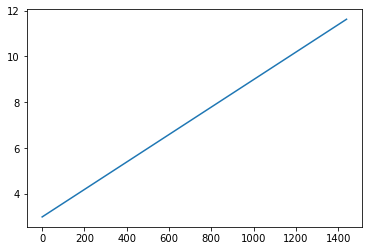

In [20]:
PeriodeRef=3600*24 #seconde
CycleParPeriode=3
Te=5*60 # seconde
Ne= 5*int(PeriodeRef/Te)
x=np.arange(Ne*Te,step=Te)
y =dfTrend.values[:,0]
Res=np.polyfit(x,y,1,full=True)
z=Res[0]
print(z)
p = np.poly1d(z)
plt.plot(p(x))

In [56]:
x=np.arange(Ne*Te,step=Te)
y =dfTrend.values[:,0]
Res=np.polyfit(x,y,1,full=True)
z=Res[0]
print(z)
p = np.poly1d(z)

[1.99984574e-05 2.98655589e+00]


In [64]:
Res

(array([1.99984574e-05, 2.98655589e+00]),
 array([558.6172182]),
 2,
 array([1.36597035, 0.36623082]),
 3.197442310920451e-13)

In [58]:
chisq_dof= Res[1] / (y.shape[0]- 2)
print(chisq_dof)

[0.38846816]


In [ ]:
d=y-p(x)
plt.plot(d)
Res

In [52]:
Res

(array([1.99984574e-05, 2.98655589e+00]),
 array([558.6172182]),
 2,
 array([1.36597035, 0.36623082]),
 3.197442310920451e-13)

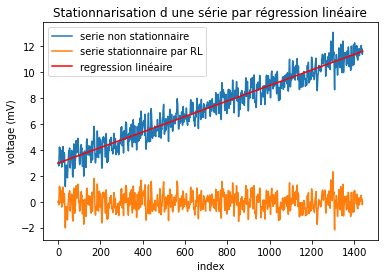

In [41]:
fig, ax = plt.subplots()

ax.plot(y,label='serie non stationnaire')
ax.plot(y-p(x),label= 'serie stationnaire par RL')
ax.plot(p(x),label='regression linéaire',color='r')
ax.set(xlabel='index', ylabel='voltage (mV)',
       title='Stationnarisation d une série par régression linéaire')
plt.legend()

fig.savefig("plot_Detrend_RL.png")
plt.show()

In [48]:
resDetrend=y-p(x)
df=pd.DataFrame([resDetrend])


In [66]:
from scipy.stats import linregress
a, b, r, p_vall, std_err = linregress(x, y)
print("a = ", a, " b = ", b, " r^2 = ", r**2)


a =  1.999845737440896e-05  b =  2.9865558856028063  r^2 =  0.9412920157434133


In [50]:

import pymannkendall as mk
result = mk.original_test(dfTrend['Pression'])
print(result)


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=48.40132092241579, Tau=0.851358968419427, s=882076.0, var_s=332121200.0, slope=0.005999083243808367, intercept=2.990933086252186)


In [51]:

import pymannkendall as mk
result = mk.original_test(resDetrend)
print(result)


Mann_Kendall_Test(trend='no trend', h=False, p=0.9902369438400935, z=-0.012236481666183399, Tau=-0.00021619952127248862, s=-224.0, var_s=332121200.0, slope=-4.5396851432276375e-07, intercept=-0.002868411106940311)


In [ ]:
p, residuals, _, _, _ = numpy.polyfit(x, y, 2, full=True)
chisq_dof = residuals / (len(x) - 3)
Q

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html

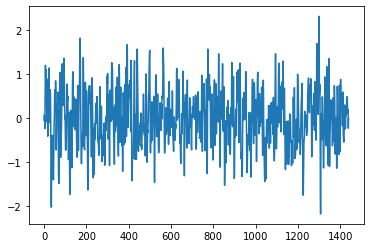

In [21]:
from scipy import signal
DeTrend=signal.detrend(dfTrend.values[:,0])
plt.plot(DeTrend)

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

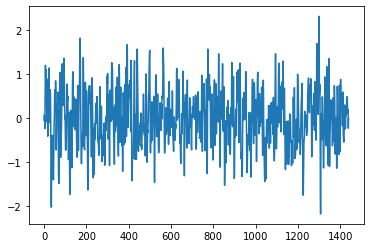

In [22]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(dfTrend.values[:,0])
plt.plot(notrend)


https://www.pythonfordatascience.org/anova-python/
http://www.jybaudot.fr/Previsions/anovachro.html

# 4) Courbe de Tendance quelconque

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

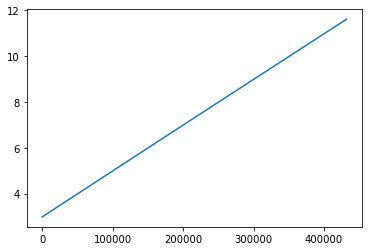

array([-2.92750970e-13,  2.01248378e-05,  2.97746912e+00])

In [23]:

from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x**2 + b*x + c
x=np.arange(Ne*Te,step=Te)
yn =dfTrend.values[:,0]
popt, pcov = curve_fit(func, x, yn)#, sigma = y_sigma)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.errorbar(x, yn, yerr = y_sigma, fmt = 'o')
ax.plot(x, np.polyval(popt, x), '-')
#ax.scatter(x,yn)
plt.show()
popt

<div style="border: 2px solid #0000ff; padding: 3px; background-color: #0099FF; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">

# Exercice supplémentaires.

# ANOVA

Préalablement aux ANOVA, procédons aux tests de Levene pour valider l’homoscédasticité. En des termes moins savants, vérifions si la dispersion est à peu près stable au sein d’une même semaine et d’une semaine à l’autre. Rappelons en effet que c’est une condition de validité du test, bien qu’il soit fréquent de faire l’impasse dessus (Note : par manque de place, nous ne procédons pas aux tests de normalité, c’est pourquoi le test de Levene a été privilégié à celui de Barlett, trop sensible aux distributions non normales).

Le test ANOVA comporte des hypothèses importantes qui doivent être satisfaites pour pour que la valeur p associée soit valide.
1. Les échantillons sont indépendants.
2. Chaque échantillon provient d'une population normalement distribuée.
3. Les écarts types de population des groupes sont tous égaux. Cette La propriété est connue sous le nom d'homoscédasticité.


## 1) Test sur les hypothéses d'ANOVA

En statistiques, un test, ou test d'hypothèse, est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle, en fonction d'un échantillon de données.

Il s'agit de statistique inférentielle : à partir de calculs réalisés sur des données observées, on émet des conclusions sur la population, en leur rattachant des risques d'être erronées. 

La p-valeur

La procédure généralement employée consiste à comparer la valeur-p à un seuil préalablement défini (traditionnellement 5 %). Si la valeur-p est inférieure à ce seuil, on rejette l'hypothèse nulle en faveur de l’hypothèse alternative, et le résultat du test est déclaré « statistiquement significatif »[1]. Dans le cas contraire, si la valeur-p est supérieure au seuil, on ne rejette pas l’hypothèse nulle, et on ne peut rien conclure quant aux hypothèses formulées. 

https://fr.m.wikipedia.org/wiki/Valeur_p

### 1) Normalité

Testez si un échantillon diffère d'une distribution normale.

Cette fonction teste l'hypothèse nulle selon laquelle un échantillon provient d'une distribution normale. Il est basé sur le test de D'Agostino et Pearson [1] , [2] qui combine l'asymétrie et l'aplatissement pour produire un test omnibus de normalité.

In [12]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
pts = 1000
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(a)#x
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 0.234072
The null hypothesis cannot be rejected


In [13]:
k2, p = stats.normaltest(dfTrend.values[:,0])#x
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 5.22384e-69
The null hypothesis can be rejected


### 3) homoscédasticité

En statistique, le Test de Levene est une statistique déductive utilisée pour évaluer l'égalité de variance pour une variable calculée pour deux groupes ou plus1.

Certaines procédures statistiques courantes supposent que les variances des populations à partir desquelles différents échantillons sont prélevés sont égales. Le test de Levene évalue cette hypothèse. Il teste l'hypothèse nulle que les variances de population sont égales (appelées « homogénéité de la variance » ou homoscédasticité). Si la valeur p résultante du test de Levene est inférieure à un niveau de signification (typiquement 0,05), il est peu probable que les différences obtenues dans les variances d'échantillon se soient produites sur la base d'un échantillonnage aléatoire d'une population à variances égales. Ainsi, l'hypothèse nulle d'égale variance est rejetée et il est conclu qu'il existe une différence entre les variances dans la population. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

Le test de Levene teste l'hypothèse nulle selon laquelle tous les échantillons d'entrée proviennent de populations à variances égales. Le test de Levene est un alternative au test de Bartlett bartlett dans le cas où il y a des écarts importants par rapport à la normalité. ( a essayer)

In [37]:
from scipy.stats import levene
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
stat, p = levene(a,b,c)#
p


0.002431505967249681

In [108]:
A=dfSta.values[:1000,0]
B=dfSta.values[1000:,0]

La faible valeur de p suggère que les populations n'ont pas la même écarts. Ce n'est pas surprenant, étant donné que la variance d'échantillon de b est beaucoup plus plus grand que celui de a et c : 

In [109]:
stat, p = levene(A,B)#
p

0.9282894309514484

In [ ]:
La faible valeur de p suggère que ...

## 2) Test ANNOVA

L'ANOVA à un facteur teste l'hypothèse nulle selon laquelle deux groupes ou plus ont la même moyenne de population. Le test est appliqué à des échantillons de deux ou plusieurs groupes, éventuellement de tailles différentes. 

In [114]:
from scipy.stats import f_oneway
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

f_oneway(tillamook, newport)#, petersburg, magadan, tvarminne

F_onewayResult(statistic=1.1485161676248705, pvalue=0.29975969106602235)

In [111]:
from scipy.stats import f_oneway

In [118]:
A=dfTrend.values[:700,0]
B=dfTrend.values[700:,0]

In [119]:
f_oneway(A,B)#, petersburg, magadan, tvarminne

F_onewayResult(statistic=1285.811302258495, pvalue=1.0519903685430449e-201)

***Choix du type de la fonction f de tendance.*** Dans la mesure où ces derniers vous restituent également les ***coefficients de corrélation***, où vous visualisez la courbe des observations, et surtout dans la mesure où vous connaissez le sujet que vous traitez, vous pouvez ne pas être d’accord avec ce choix et en privilégier un autre.

Ne cherchons pas l'originalité : commençons par le plus simple (on se place dans le cadre d’une observation sur plusieurs années).

Hypothèse : on suppose la tendance linéaire. Elle est alors formalisée par la droite de régression linéaire entre l’unité de mesure du temps t (t = 1, 2, 3…) et y (ventes, appels, achats…). Le coefficient de corrélation est peut-être tout petit mais c’est normal si les fluctuations saisonnières sont importantes (illustration en bas de page). C’est l'une des raisons pour laquelle les prévisionnistes procèdent à la régression sur moyennes annuelles ou sur la série filtrée par moyennes mobiles.

A peine moins facile, on SAIT qu’il existe une croissance à taux constant. Avec Excel, et sous réserve de données positives, soit vous créez une colonne des logarithmes de y (fonction LN pour Excel) soit vous travaillez directement sur la fonction exponentielle (voir exemple la page régression sur tendance exponentielle).

D’une façon générale, si vous cherchez juste à rattacher une tendance brouillée par de nombreux mouvements à un type de fonction connue, vous pouvez facilement le faire avec Excel, qui calcule des tendances affines, exponentielles, logarithmiques, polynomiales (degré 2 à 6) et puissance : clic droit sur la courbe puis Options de courbe de tendance. Sur un logiciel plus évolué en traitements statistiques, vous bénéficiez de plus d’options, d’intervalles de confiance et d’intervalles de prévision.

Enfin, en cas de valeurs aberrantes, il peut être judicieux de les calculer à partir des médianes annuelles (mais la désaisonnalisation nécessitera une petite correction) ou d'employer la méthode de Theil.

 

Exemple

La courbe ci-dessous montre l’évolution du fret aérien des ADP (Aéroports de Paris) entre janvier 82 et décembre 2007 (en millier de tonnes, source INSEE). Elle illustre bien les limites d’un ajustement de la tendance par une fonction. Alors que le trend semblait linéaire depuis 10 ans, celui-ci s’est modifié et apparaît maintenant comme une évolution exponentielle (courbe rouge)… jusqu’au jour où ce modèle sera à son tour invalidé !

Fret aérien

Les données ci-dessous sont celles de l’indice INSEE de la production industrielle – produits de la construction automobile. La saisonnalité est forte et l'on observe une valeur aberrante (c'est la dernière ; mais disposant d'une série de 72 valeurs, nous considèrons qu'elle n'est pas perturbatrice et nous la maintenons).

Exemple

Si l’on résume cette évolution par une droite établie sur l’ensemble des valeurs, on obtient un R² = 0,3074 (courbe en rouge). Calculé sur les six moyennes annuelles, il est évidemment beaucoup plus élevé (0,9931). Calculé sur les six médianes, R² = … 1 ( !).

Zoom sur prod industrielle